In [1]:
import pandas as pd 
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import csv
from datetime import datetime
import random

In [10]:
# Import tables
#eruptions = pd.read_csv("eruptions_reunion.csv")
#average_rain = pd.read_csv("average_reunion.csv")
eruptions = pd.read_csv("eruptions_galapagos.csv")
#climate_bellavista = pd.read_csv("climate_bellavista.csv")
#average_rain = climate_bellavista[['observation_date', 'precipitation']]
climate_ayora = pd.read_csv("climate_puerto-ayora.csv")
average_ayora = climate_ayora[['observation_date', 'precipitation']]


In [3]:
def date_to_decimal_year(date_str):
    date_obj = datetime.strptime(date_str, '%Y-%m-%d')
    year = date_obj.year
    day_of_year = date_obj.timetuple().tm_yday
    decimal_year = year + (day_of_year - 1) / 365.0
    decimal_year = round(decimal_year,4) 
    return decimal_year

In [50]:
def accuracies(rolling_numbers, percents, rain_start, rain_end, average_rain, erupt_dates, start, end):
        predictions = []
        
        for j in percents:
                
                season_length = int((j * 365) / 100)
                
                for i in rolling_numbers:
                        rolling_rain = average_rain.copy() 
                        rolling_rain['roll' + str(i)] = average_rain.precipitation.rolling(i).sum()
                        rolling_rain = rolling_rain.dropna()
                        rainy_dates = pd.DataFrame()

                        for k in range(end - start):
                                year = start + k
                                yearly_rain = rolling_rain[(rolling_rain['observation_date'] >= str(year) + '-' + rain_start) & (rolling_rain['observation_date'] <= str(year + 1) + '-' + rain_end)].sort_values(by=['roll' + str(i)])
                                rainy_dates = rainy_dates.append(yearly_rain[-(season_length+1):-1])

                        rain_erup_freq = 0
                        for l in erupt_dates:
                                if l in np.array(rainy_dates['observation_date']):
                                        rain_erup_freq += 1

                        predictions.append([i, j, rain_erup_freq / len(erupt_dates)])

        return predictions


In [49]:
#Scaling the values doesn't actually do anything
# erupt_dates = eruptions['Start'][eruptions['Start'] >= '1965']
# average_ayora['regress'] = average_ayora.precipitation.rolling(90).sum()
# average_ayora['regress'] = (0.531768 * average_ayora['regress']) + 0.912098
# average_ayora = average_ayora.dropna()
# rainy_dates = pd.DataFrame()

# for k in range(59):
#     year = 1965 + k
#     yearly_rain = average_ayora[(average_ayora['observation_date'] >= str(year) + '-' + '11-01') & (average_ayora['observation_date'] <= str(year + 1) + '-' + '10-31')].sort_values(by=['regress'])
#     rainy_dates = rainy_dates.append(yearly_rain[-73:-1])

# rain_erup_freq = 0
# for l in erupt_dates:
#     if l in np.array(rainy_dates['observation_date']):
#         rain_erup_freq += 1

# print(rain_erup_freq / len(erupt_dates))

/var/folders/d0/48hh0ndj2v59mjry93b9grn00000gn/T/ipykernel_91551/1230501068.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  average_ayora['regress'] = average_ayora.precipitation.rolling(90).sum()
/var/folders/d0/48hh0ndj2v59mjry93b9grn00000gn/T/ipykernel_91551/1230501068.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  average_ayora['regress'] = (0.531768 * average_ayora['regress']) + 0.912098
/var/folders/d0/48hh0ndj2v59mjry93b9grn00000gn/T/ipykernel_91551/1230501068.py:10: FutureWarning: The frame

0.35714285714285715


/var/folders/d0/48hh0ndj2v59mjry93b9grn00000gn/T/ipykernel_91551/1230501068.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rainy_dates = rainy_dates.append(yearly_rain[-73:-1])
/var/folders/d0/48hh0ndj2v59mjry93b9grn00000gn/T/ipykernel_91551/1230501068.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rainy_dates = rainy_dates.append(yearly_rain[-73:-1])


In [19]:
# # Creates the blank csv file

# csv_file_name = 'reunion_accuracies.csv'
# #Fix this so that it doesnt overwrite the header

# column_names = ['Rolling sums (days)', 'Rainy season (fraction of year)', 'Fraction of eruptions in rainy season', 'Prediction improvement']

# # Open the CSV file in write mode ('w', 'wb', or 'w+', depending on your Python version).
# with open(csv_file_name, mode='w', newline='') as csv_file:
#     # Create a DictWriter object with the column names.
#     csv_writer = csv.DictWriter(csv_file, fieldnames=column_names)

#     # Write the header (column names) to the CSV file.
#     csv_writer.writeheader()

In [51]:
# Creates the blank csv file

csv_file_name = 'ayora_accuracies.csv'
#Fix this so that it doesnt overwrite the header

column_names = ['Rolling sums (days)', 'Rainy season (fraction of year)', 'Fraction of eruptions in rainy season', 'Prediction improvement']

# Open the CSV file in write mode ('w', 'wb', or 'w+', depending on your Python version).
with open(csv_file_name, mode='w', newline='') as csv_file:
    # Create a DictWriter object with the column names.
    csv_writer = csv.DictWriter(csv_file, fieldnames=column_names)

    # Write the header (column names) to the CSV file.
    csv_writer.writeheader()

In [6]:
print(np.array(eruptions['Start']))

['2005-10-22' '2018-06-26' '1963-04-13' '1979-11-13' '2008-05-29'
 '1979-01-29' '1998-09-15' '1991-09-25' '1961-03-21' '1968-05-21'
 '1968-06-11' '1972-06-04' '1973-12-09' '1978-08-08' '1981-08-01'
 '1984-03-30' '1988-09-14' '1991-04-19' '2020-01-12' '1995-01-25'
 '2005-05-13' '2009-04-10' '1977-03-23' '2017-09-04' '2018-06-16'
 '2022-01-06' '2015-05-25' '1963-03-04' '1982-08-28' '1993-12-05'
 '1967-08-09']


In [38]:
print(average_ayora)

      observation_date  precipitation
0           1964-12-31            0.0
1           1965-01-01            0.7
2           1965-01-02            0.0
3           1965-01-03            0.0
4           1965-01-04            0.3
...                ...            ...
21291       2023-05-06            3.0
21292       2023-05-07            0.0
21293       2023-05-08            0.0
21294       2023-05-09            3.5
21295       2023-05-10            4.6

[21296 rows x 2 columns]


In [52]:
# Fills the blank csv file
erupt_dates = eruptions['Start'][eruptions['Start'] >= '1965']
# Choose rolling number and length of rainy season
rolling_numbers = [30, 60, 90, 120]
percents = [5, 10, 15, 20, 25, 30]
predictions = accuracies(rolling_numbers, percents, '11-01', '10-31', average_ayora, erupt_dates, 1965, 2023)

for i in predictions:
    with open('ayora_accuracies.csv', mode='a', newline='') as main:
        csv_writer = csv.writer(main)
        csv_writer.writerow([i[0], i[1]/100, round(i[2],2), round(100*((100*i[2])-i[1])/i[1],2)])



# x = [i[0] for i in predictions]
# y = [i[1] for i in predictions]

# fig = plt.figure(figsize=(8,6))
# ax = fig.add_subplot(111)

# plt.scatter(x, y, c='green', s=300)

# plt.show()

/var/folders/d0/48hh0ndj2v59mjry93b9grn00000gn/T/ipykernel_91551/1340342977.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rainy_dates = rainy_dates.append(yearly_rain[-(season_length+1):-1])
/var/folders/d0/48hh0ndj2v59mjry93b9grn00000gn/T/ipykernel_91551/1340342977.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rainy_dates = rainy_dates.append(yearly_rain[-(season_length+1):-1])
/var/folders/d0/48hh0ndj2v59mjry93b9grn00000gn/T/ipykernel_91551/1340342977.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rainy_dates = rainy_dates.append(yearly_rain[-(season_length+1):-1])
/var/folders/d0/48hh0ndj2v59mjry93b9grn00000gn/T/ipykernel_91551/1340342977.py:17: FutureWarning: The frame.append method is deprecated and

In [20]:
# # Fills the blank csv file

# # Choose rolling number and length of rainy season
# rolling_numbers = [30, 60, 90, 120]
# percents = [5, 10, 15, 20, 25, 30]

# predictions = accuracies(rolling_numbers, percents)

# for i in predictions:
#     with open('reunion_accuracies.csv', mode='a', newline='') as main:
#         csv_writer = csv.writer(main)
#         csv_writer.writerow([i[0], i[1]/100, round(i[2],2), round(100*((100*i[2])-i[1])/i[1],2)])



# # x = [i[0] for i in predictions]
# # y = [i[1] for i in predictions]

# # fig = plt.figure(figsize=(8,6))
# # ax = fig.add_subplot(111)

# # plt.scatter(x, y, c='green', s=300)

# # plt.show()

/var/folders/d0/48hh0ndj2v59mjry93b9grn00000gn/T/ipykernel_89635/1421806179.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rainy_dates = rainy_dates.append(yearly_rain[-(season_length+1):-1])
/var/folders/d0/48hh0ndj2v59mjry93b9grn00000gn/T/ipykernel_89635/1421806179.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rainy_dates = rainy_dates.append(yearly_rain[-(season_length+1):-1])
/var/folders/d0/48hh0ndj2v59mjry93b9grn00000gn/T/ipykernel_89635/1421806179.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rainy_dates = rainy_dates.append(yearly_rain[-(season_length+1):-1])
/var/folders/d0/48hh0ndj2v59mjry93b9grn00000gn/T/ipykernel_89635/1421806179.py:21: FutureWarning: The frame.append method is deprecated and

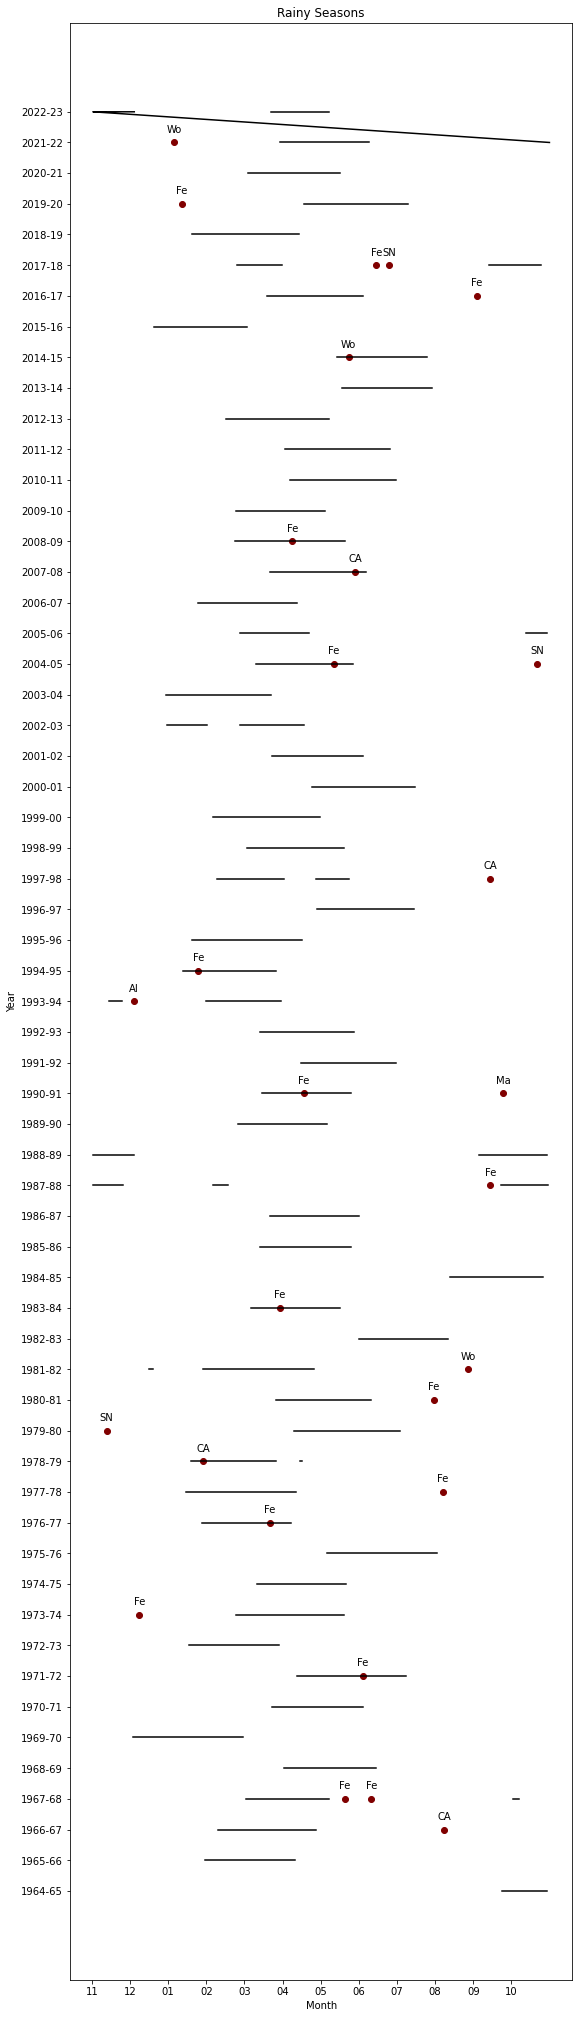

In [53]:
# Generates the rainy season plot
# volcanos = {'Fournaise, Piton de la': 'PF'}
volcanos = {'Fernandina': 'Fe', 'Azul, Cerro': 'CA', 'Negra, Sierra': 'SN', 'Wolf': 'Wo', 'Marchena': 'Ma', 'Alcedo': 'Al'}

rolling_rain = average_ayora.copy()
rain_start = '11-01'
rain_end = '10-31'
rolling_rain['roll90'] = average_ayora.precipitation.rolling(90).mean()
rolling_rain = rolling_rain.dropna()

plt.figure(figsize=(9,36))

decimal_erupts = np.array(erupt_dates.apply(date_to_decimal_year))
x = [((i + (2/12)) % 1) for i in decimal_erupts]
y = [(i + (2/12)) // 1 for i in decimal_erupts]
labels = list(eruptions['Volcano'][eruptions['Start'] >= '1965'])
plt.scatter(x, y, color='maroon')
for i in range(len(x)):
    plt.annotate(volcanos[labels[i]], (x[i], y[i]), textcoords="offset points", xytext=(0,10), ha='center')


for k in range(59):
        year = 1964 + k
        yearly_rain = rolling_rain[(rolling_rain['observation_date'] >= str(year) + '-' + rain_start) & (rolling_rain['observation_date'] <= str(year + 1) + '-' + rain_end)].sort_values(by=['roll90'])
        rainy_season = yearly_rain[-73:-1].sort_values(by=['observation_date'])
        rainy_array = np.array(rainy_season['observation_date'].apply(date_to_decimal_year))
        x = []
        y = []
        for i in range(len(rainy_array)):
                year = (rainy_array[i] + 2/12) // 1
                month_day = (rainy_array[i] + 2/12) % 1
                if len(x) == 0:
                       x.append(month_day)
                       y.append(year)
                elif rainy_array[i] - rainy_array[i-1] <= .05:
                       if i == len(rainy_array) - 1:
                                plt.plot(x, y, color='black')
                       else:
                                x.append(month_day)
                                y.append(year)   
                else:
                       plt.plot(x, y, color='black')
                       x = [month_day]
                       y = [year]

plt.yticks([1965+k for k in range(59)], [str(1964+k) + '-' + str(1965+k)[2:4] for k in range(59)])
plt.xticks([(1/12)*k for k in range(12)], ['11', '12', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10'])
plt.xlabel("Month") 
plt.ylabel("Year") 
plt.title('Rainy Seasons') 
plt.show() 